<a href="https://colab.research.google.com/github/Elwing-Chou/tibaml1017/blob/main/sobel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from urllib.request import urlretrieve
url = "https://upload.wikimedia.org/wikipedia/commons/3/3f/Bikesgray.jpg"
urlretrieve(url, "test.jpg")

('test.jpg', <http.client.HTTPMessage at 0x7f785abdd310>)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open("test.jpg")
img_np = np.array(img)
plt.imshow(img_np, cmap="gray")

In [9]:
# Gx
shape = img_np.shape
img_gx = np.zeros(shape)
Gx = [
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
]
for i in range(1, shape[0]-1):
    for j in range(1, shape[1]-1):
        # 中心
        ci, cj = i, j
        newvalue = 0
        for addi in [-1, 0, 1]:
            for addj in [-1, 0, 1]:
                # target
                ti, tj = ci+addi, cj+addj
                newvalue = newvalue + Gx[addi+1][addj+1] * img_np[ti][tj]
        img_gx[ci][cj] = abs(newvalue)
img_gx

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,  10.,  21., ...,   5.,  20.,   0.],
       [  0.,  16.,  21., ...,  16.,  27.,   0.],
       ...,
       [  0., 108., 200., ...,   3.,   0.,   0.],
       [  0.,  73., 149., ...,   5.,   5.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

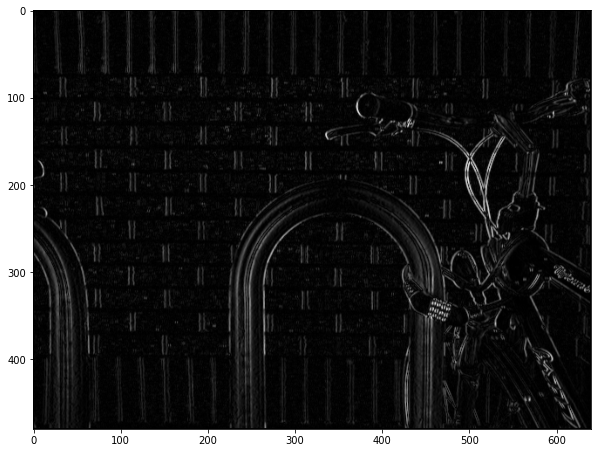

In [21]:
# 0-255 0.0-1.0 這兩種都可以直接使用matplotlib畫
ma, mi = img_gx.max(), img_gx.min()
img_gx_scale = (img_gx - mi) / (ma - mi)
plt.figure(figsize=(10, 10))
plt.imshow(img_gx_scale, cmap="gray")

In [13]:
# Gy
shape = img_np.shape
img_gy = np.zeros(shape)
Gy = [
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
]
for i in range(1, shape[0]-1):
    for j in range(1, shape[1]-1):
        # 中心
        ci, cj = i, j
        newvalue = 0
        for addi in [-1, 0, 1]:
            for addj in [-1, 0, 1]:
                # target
                ti, tj = ci+addi, cj+addj
                newvalue = newvalue + Gy[addi+1][addj+1] * img_np[ti][tj]
        img_gy[ci][cj] = abs(newvalue)
img_gy

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  6., 11., ..., 25., 16.,  0.],
       [ 0., 30., 19., ...,  0., 13.,  0.],
       ...,
       [ 0., 14., 24., ...,  3.,  0.,  0.],
       [ 0., 23., 99., ...,  1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

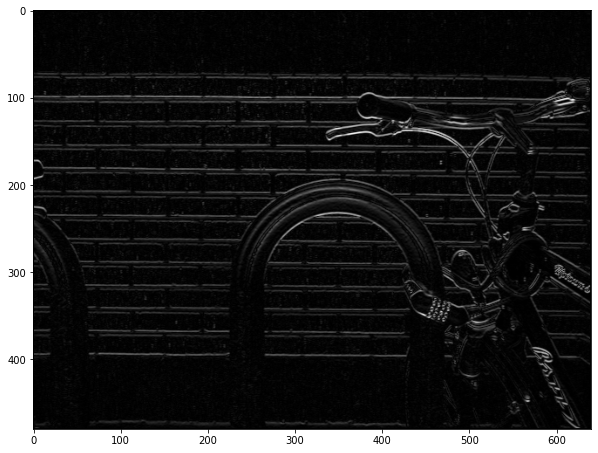

In [22]:
# 0-255 0.0-1.0 這兩種都可以直接使用matplotlib畫
ma, mi = img_gy.max(), img_gy.min()
img_gy_scale = (img_gy - mi) / (ma - mi)
plt.figure(figsize=(10, 10))
plt.imshow(img_gy_scale, cmap="gray")

In [ ]:
img_sobel = np.zeros(shape)
for i in range(shape[0]):
    for j in range(shape[1]):
        img_sobel[i][j] = (img_gx[i][j] ** 2 + img_gy[i][j] ** 2) ** 0.5
img_sobel

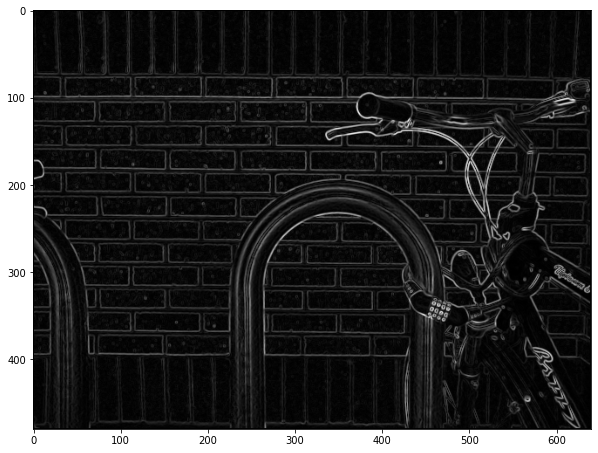

In [23]:
# 0-255 0.0-1.0 這兩種都可以直接使用matplotlib畫
ma, mi = img_sobel.max(), img_sobel.min()
img_sobel_scale = (img_sobel - mi) / (ma - mi)
plt.figure(figsize=(10, 10))
plt.imshow(img_sobel_scale, cmap="gray")